# ECG Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import tree
from sklearn.tree import plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
df = pd.read_csv('/Users/rithikak/Downloads/heart.csv')

In [3]:
df.loc[df['Sex'] == 'M', 'MaxHR'] = 220 - df.loc[df['Sex'] == 'M', 'Age']
df.loc[df['Sex'] == 'F', 'MaxHR'] = 226 - df.loc[df['Sex'] == 'F', 'Age']

In [4]:
df.shape

(918, 12)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,180,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,177,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,183,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,178,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,166,N,0.0,Up,0


## Dataset Attributes

Age : age of the patient [years]

Sex : sex of the patient [M: Male, F: Female]

ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP:
Non-Anginal Pain, ASY: Asymptomatic]

RestingBP : resting blood pressure [mm Hg]

Cholesterol : serum cholesterol [mm/dl]

FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by 
Estes' criteria]

MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina : exercise-induced angina [Y: Yes, N: No]

Oldpeak : oldpeak = ST [Numeric value measured in depression]

ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease : output class [1: heart disease, 0: Normal]

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,167.750545,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,9.875776,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,143.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,161.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,167.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,175.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,196.000000,6.200000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Count plot 

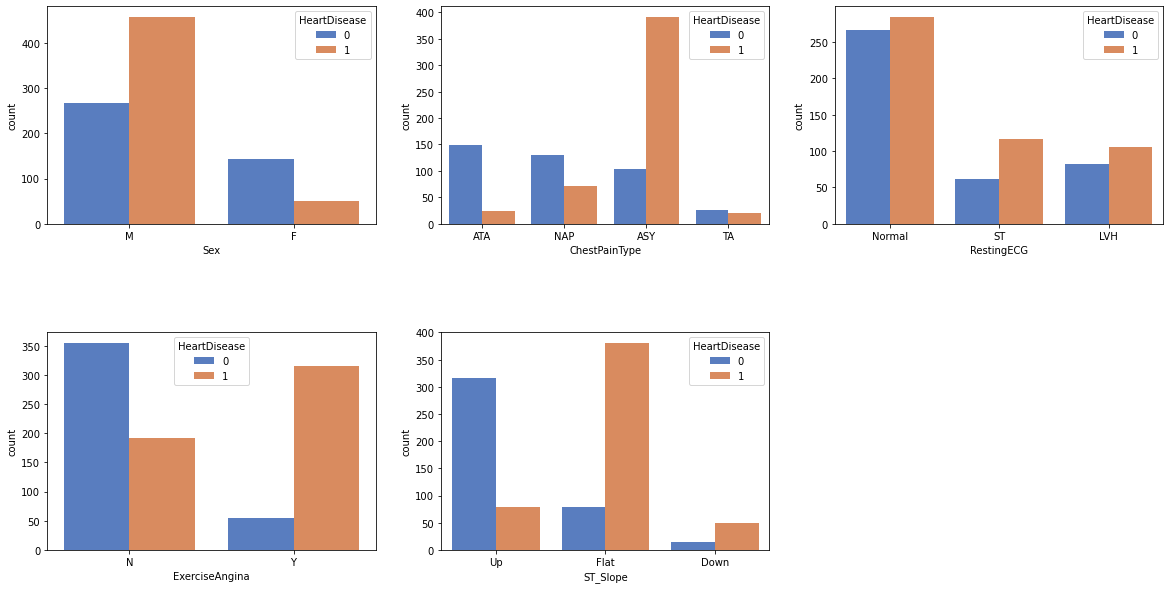

In [8]:
from numpy.core.shape_base import stack
plt.figure(figsize=(20,10))
for i,col in enumerate(df.select_dtypes('object')):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col, hue='HeartDisease',palette="muted")
    plt.subplots_adjust(hspace=0.5)
plt.show()

## Histogram plot

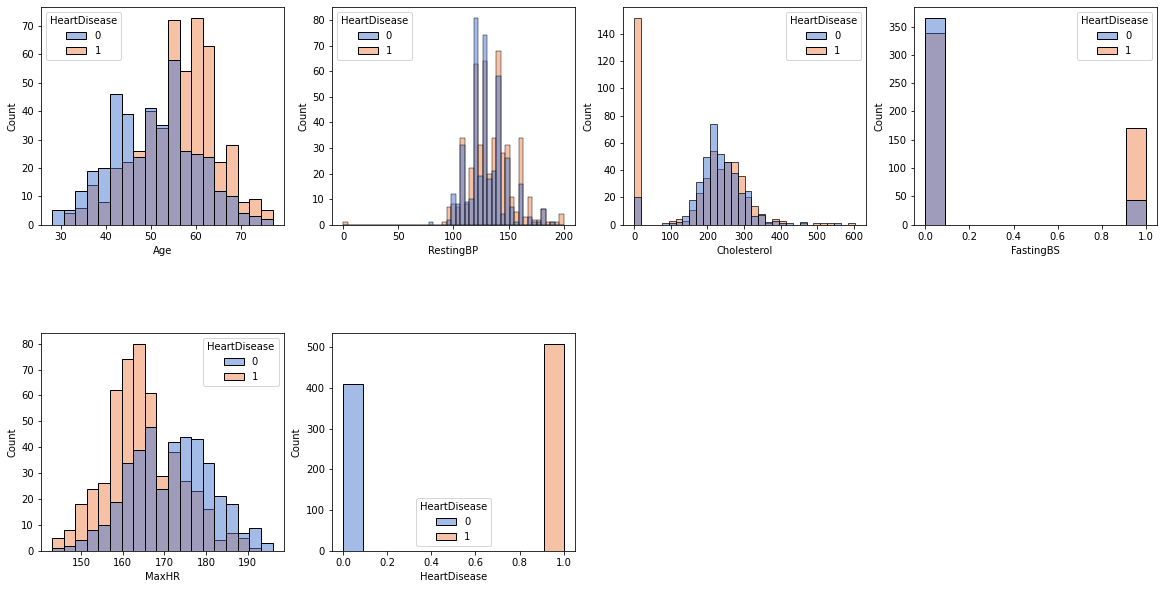

In [9]:
plt.figure(figsize=(20,10))
for i,col in enumerate(df.select_dtypes('int','float')):
  plt.subplot(2,4,i+1)
  sns.histplot(data=df, x=col, hue='HeartDisease',palette="muted")
  plt.subplots_adjust(hspace=0.5)
plt.show()

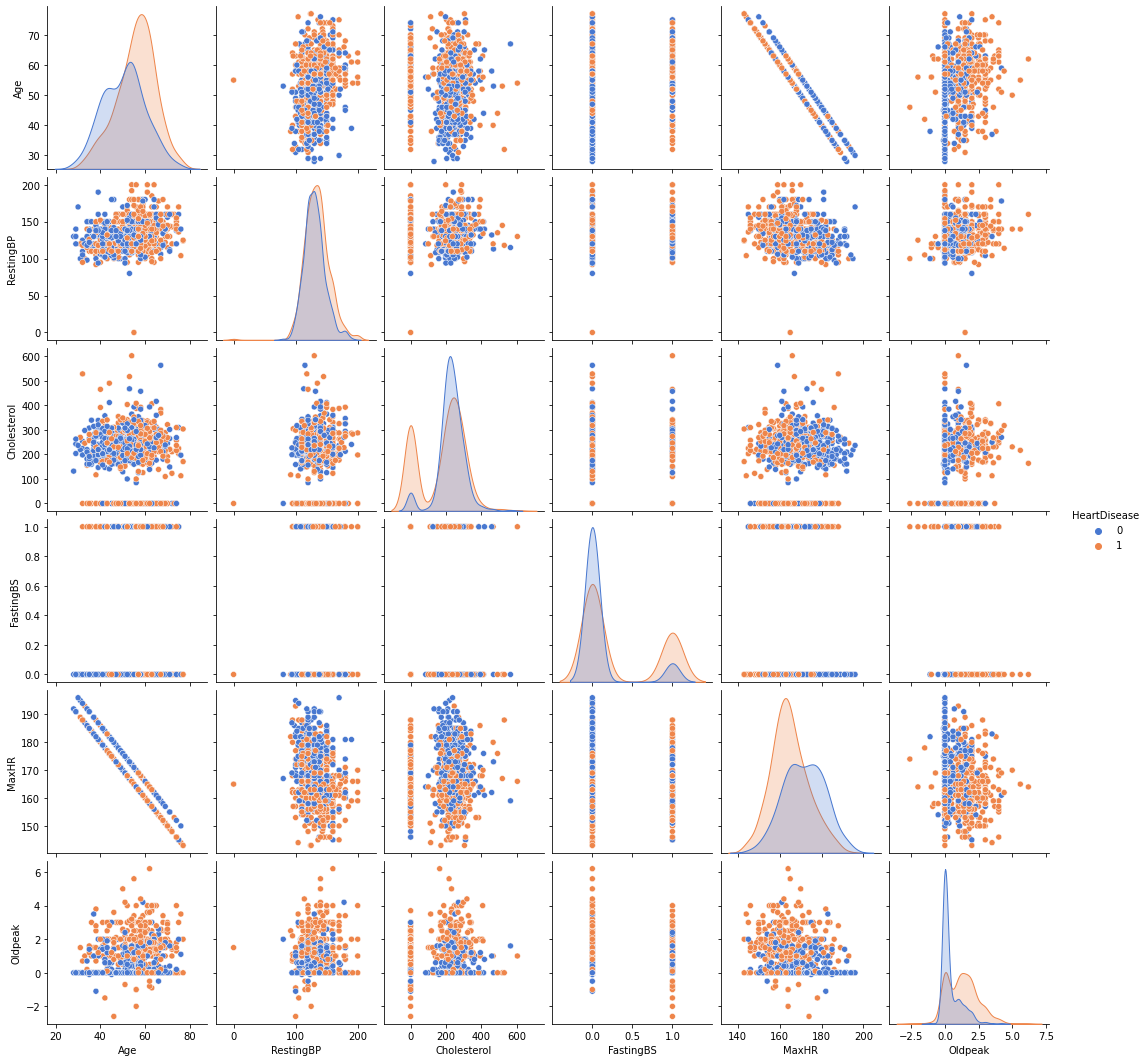

In [10]:
sns.pairplot(df, hue="HeartDisease",palette="muted");

## Checking null values

In [11]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [14]:
df.duplicated().sum()

0

## Scaling data

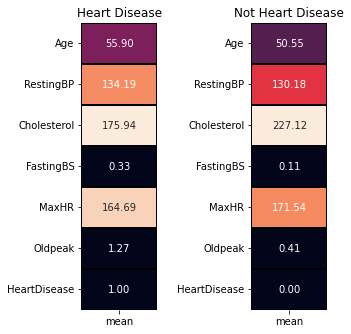

In [15]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');
plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Not Heart Disease');
fig.tight_layout(pad = 2)

In [16]:
df.var()

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR              97.530943
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

In [17]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])

In [18]:
df.var()

Age             1.001091
RestingBP       1.001091
Cholesterol     1.001091
FastingBS       0.178968
MaxHR           1.001091
Oldpeak         0.014690
HeartDisease    0.247420
dtype: float64

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.241030,N,0.295455,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.937091,N,0.409091,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,1.544969,N,0.295455,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,1.038404,Y,0.465909,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.177353,N,0.295455,Up,0


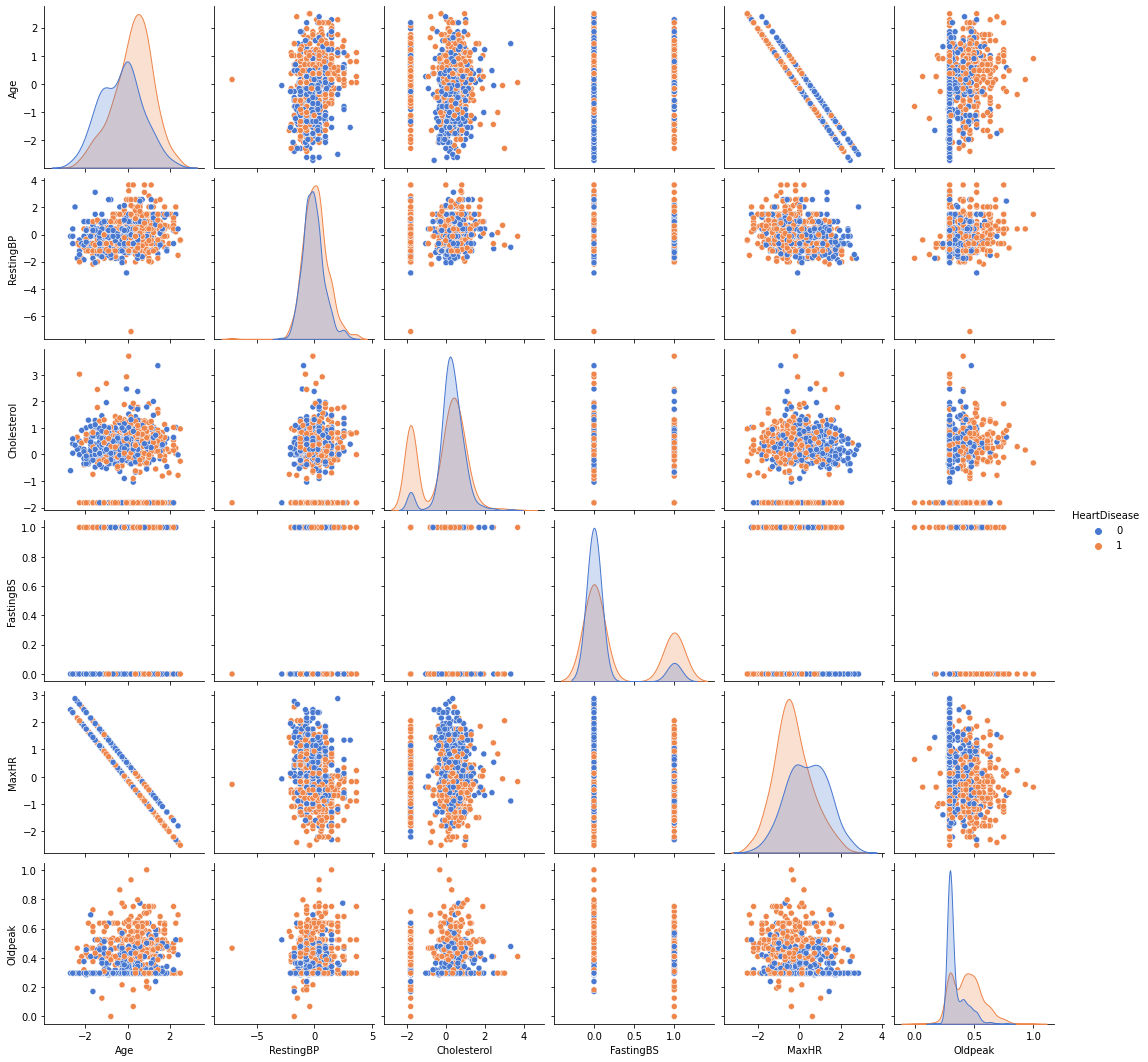

In [20]:
sns.pairplot(df, hue="HeartDisease",palette="muted");

## Label encoding

In [21]:
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.ChestPainType = le.fit_transform(df.ChestPainType)
df.RestingECG = le.fit_transform(df.RestingECG)
df.ExerciseAngina = le.fit_transform(df.ExerciseAngina)
df.ST_Slope = le.fit_transform(df.ST_Slope)

## Correlate feature

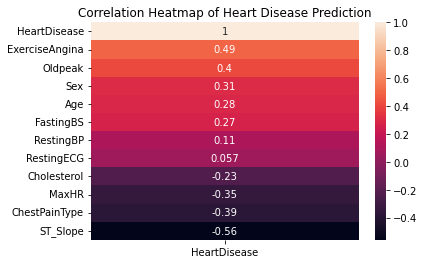

In [22]:
sns.heatmap(df.corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Disease Prediction')
plt.show()

In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.241030,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.937091,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,1.544969,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,1.038404,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.177353,0,0.295455,2,0


## Modeling

In [24]:
df = df.copy();
X = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [25]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
y_lr_pred1 = lr_model.predict(X_train)
y_lr_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_lr_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_lr_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_lr_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       112
           1       0.93      0.85      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276

Accuracy of the Train Model: 85.04672897196261 %
Accuracy of the Test Model: 87.31884057971014 %


In [26]:
parameters = {"C": np.arange(1,10,0.5)}
lr_best = GridSearchCV(lr_model, parameters, cv=5)
lr_best.fit(X_train,y_train)
lr_best.best_estimator_

LogisticRegression(C=9.5)

In [27]:
y_lr_pred = lr_best.predict(X_test)
y_lr_pred1 = lr_best.predict(X_train)
print(classification_report(y_test, y_lr_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_lr_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_lr_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

Accuracy of the Train Model: 85.04672897196261 %
Accuracy of the Test Model: 86.59420289855072 %


In [28]:
SVM = SVC()
SVM.fit(X_train, y_train)
y_SVM_pred1 = SVM.predict(X_train)
y_SVM_pred = SVM.predict(X_test)
print(classification_report(y_test, y_SVM_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_SVM_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_SVM_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       112
           1       0.90      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276

Accuracy of the Train Model: 86.91588785046729 %
Accuracy of the Test Model: 87.68115942028986 %


In [29]:
parameters = {"C":np.arange(0,11,0.5)}
SVM_best=GridSearchCV(SVM, parameters)
SVM_best.fit(X_train,y_train)
SVM_best.best_estimator_

SVC(C=6.0)

In [30]:
y_SVM_pred1 = SVM_best.predict(X_train)
y_SVM_pred = SVM_best.predict(X_test)
print(classification_report(y_test, y_SVM_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_SVM_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_SVM_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       112
           1       0.89      0.84      0.87       164

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.85       276

Accuracy of the Train Model: 90.96573208722741 %
Accuracy of the Test Model: 84.42028985507247 %


In [31]:
SVM_kernel = SVC(kernel='rbf',C=1,gamma=1)
SVM_kernel.fit(X_train, y_train)
y_SVM_pred3 = SVM_kernel.predict(X_train)
y_SVM_pred2 = SVM_kernel.predict(X_test)
print(classification_report(y_test, y_SVM_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_SVM_pred3)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_SVM_pred2)*100,"%")

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       112
           1       0.89      0.84      0.87       164

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.85       276

Accuracy of the Train Model: 97.19626168224299 %
Accuracy of the Test Model: 82.6086956521739 %


In [32]:
parameters = {"C":np.arange(0,11,0.1),"gamma":(0,11,0.1)}
SVM_kernel_best=GridSearchCV(SVM_kernel, parameters)
SVM_kernel_best.fit(X_train,y_train)
SVM_kernel_best.best_estimator_

SVC(C=4.2, gamma=0.1)

In [33]:
y_SVM_pred3 = SVM_kernel_best.predict(X_train)
y_SVM_pred2 = SVM_kernel_best.predict(X_test)
print(classification_report(y_test, y_SVM_pred2))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_SVM_pred3)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_SVM_pred2)*100,"%")

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       112
           1       0.89      0.87      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276

Accuracy of the Train Model: 89.8753894080997 %
Accuracy of the Test Model: 85.5072463768116 %


In [34]:
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_tr_pred1 = tr.predict(X_train)
y_tr_pred = tr.predict(X_test)
print(classification_report(y_test, y_tr_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_tr_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_tr_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       112
           1       0.85      0.71      0.77       164

    accuracy                           0.75       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.77      0.75      0.76       276

Accuracy of the Train Model: 100.0 %
Accuracy of the Test Model: 75.36231884057972 %


In [35]:
param_grid = {"max_depth": np.arange(1,10)}
tr_best = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), param_grid)
tr_best.fit(X_train, y_train)
tr_best.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
y_tr_pred1 = tr_best.predict(X_train)
y_tr_pred = tr_best.predict(X_test)
print(classification_report(y_test, y_tr_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_tr_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_tr_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       112
           1       0.88      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.83      0.83       276

Accuracy of the Train Model: 85.66978193146417 %
Accuracy of the Test Model: 82.6086956521739 %


In [37]:
rf = RandomForestClassifier(n_estimators=100,max_depth=150, random_state=0)
rf.fit(X_train, y_train)
y_rf_pred1 = rf.predict(X_train)
y_rf_pred = rf.predict(X_test)
print(classification_report(y_test, y_rf_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_rf_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_rf_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       112
           1       0.90      0.87      0.88       164

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

Accuracy of the Train Model: 100.0 %
Accuracy of the Test Model: 86.23188405797102 %


In [38]:
param_grid = { "n_estimators": [100,600],"max_depth" : [1,10],"random_state":[0]}
rf_best = GridSearchCV(estimator = rf, param_grid=param_grid, cv= 5)
rf_best.fit(X_train, y_train)
rf_best.best_params_

{'max_depth': 10, 'n_estimators': 600, 'random_state': 0}

In [39]:
y_rf_pred1 = rf_best.predict(X_train)
y_rf_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_rf_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_rf_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_rf_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Accuracy of the Train Model: 99.53271028037383 %
Accuracy of the Test Model: 88.04347826086956 %


In [40]:
rf_best = RandomForestClassifier(n_estimators=200,max_depth=8, random_state=0)
rf_best.fit(X_train, y_train)
y_rf_pred1 = rf_best.predict(X_train)
y_rf_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_rf_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_rf_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_rf_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       112
           1       0.91      0.88      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

Accuracy of the Train Model: 96.26168224299066 %
Accuracy of the Test Model: 87.31884057971014 %


In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_knn_pred1 = knn.predict(X_train)
y_knn_pred = knn.predict(X_test)
print(classification_report(y_test, y_knn_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_knn_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_knn_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       112
           1       0.88      0.84      0.86       164

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.83      0.83       276

Accuracy of the Train Model: 89.25233644859813 %
Accuracy of the Test Model: 83.33333333333334 %


In [42]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn_best = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
knn_best.fit(X_train, y_train)
knn_best.best_estimator_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


KNeighborsClassifier(n_neighbors=11)

In [43]:
y_knn_pred1 = knn_best.predict(X_train)
y_knn_pred = knn_best.predict(X_test)
print(classification_report(y_test, y_knn_pred))
print("Accuracy of the Train Model:",accuracy_score(y_train, y_knn_pred1)*100,"%")
print("Accuracy of the Test Model:",accuracy_score(y_test, y_knn_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.91      0.88      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

Accuracy of the Train Model: 84.89096573208724 %
Accuracy of the Test Model: 87.68115942028986 %


## Evaluation

<AxesSubplot:>

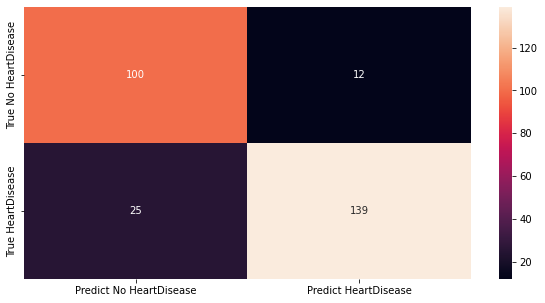

In [44]:
lr_best = LogisticRegression(C=9.5)
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_lr_pred)
x_axis_labels = ['Predict No HeartDisease','Predict HeartDisease'] # labels for x-axis
y_axis_labels = ['True No HeartDisease','True HeartDisease'] # labels for y-axis
sns.heatmap(cm1, annot=True, fmt = 'g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

<AxesSubplot:>

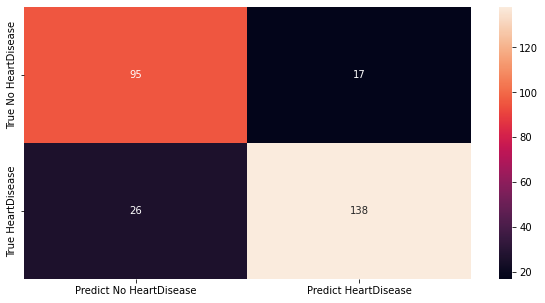

In [45]:
SVM_best=SVC(C=7)
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_SVM_pred)
x_axis_labels = ['Predict No HeartDisease','Predict HeartDisease'] # labels for x-axis
y_axis_labels = ['True No HeartDisease','True HeartDisease'] # labels for y-axis
sns.heatmap(cm1, annot=True, fmt = 'g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

<AxesSubplot:>

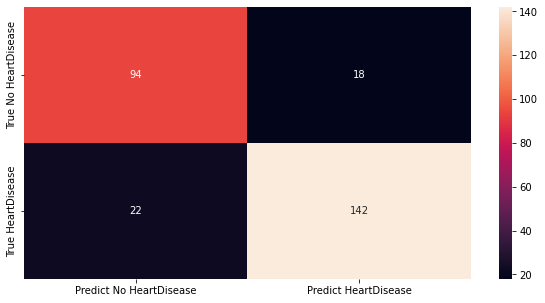

In [46]:
SVM_kernel_best=SVC(C=0.9,gamma=0.1)
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_SVM_pred2)
x_axis_labels = ['Predict No HeartDisease','Predict HeartDisease'] # labels for x-axis
y_axis_labels = ['True No HeartDisease','True HeartDisease'] # labels for y-axis
sns.heatmap(cm1, annot=True, fmt = 'g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

<AxesSubplot:>

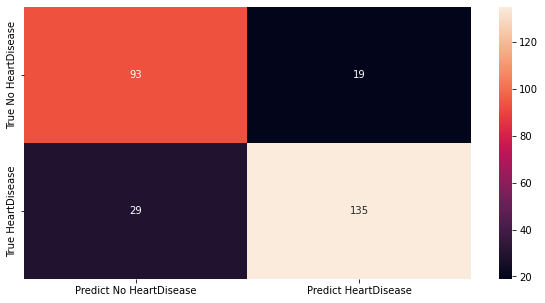

In [47]:
tr_best = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_tr_pred)
x_axis_labels = ['Predict No HeartDisease','Predict HeartDisease'] # labels for x-axis
y_axis_labels = ['True No HeartDisease','True HeartDisease'] # labels for y-axis
sns.heatmap(cm1, annot=True, fmt = 'g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

<AxesSubplot:>

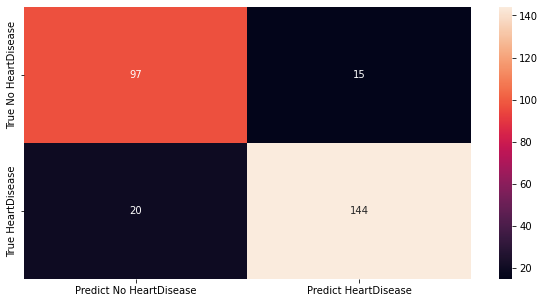

In [48]:
rf_best = RandomForestClassifier(n_estimators=200,max_depth=8, random_state=0)
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_rf_pred)
x_axis_labels = ['Predict No HeartDisease','Predict HeartDisease'] # labels for x-axis
y_axis_labels = ['True No HeartDisease','True HeartDisease'] # labels for y-axis
sns.heatmap(cm1, annot=True, fmt = 'g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

<AxesSubplot:>

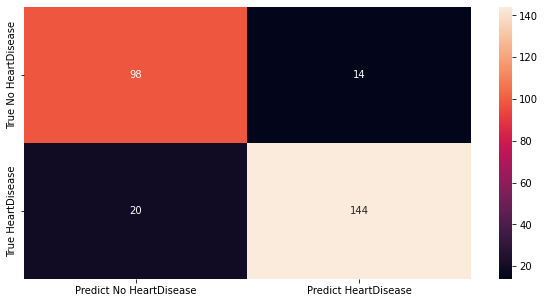

In [49]:
knn_bast = KNeighborsClassifier(n_neighbors=10)
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_knn_pred)
x_axis_labels = ['Predict No HeartDisease','Predict HeartDisease'] # labels for x-axis
y_axis_labels = ['True No HeartDisease','True HeartDisease'] # labels for y-axis
sns.heatmap(cm1, annot=True, fmt = 'g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

## Comparison

In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
hasil1 = [(accuracy_score(y_test, y_lr_pred) * 100), (recall_score(y_test, y_lr_pred,  pos_label=1) * 100), (precision_score(y_test, y_lr_pred,  pos_label=1) * 100), (f1_score(y_test, y_lr_pred,  pos_label=1) * 100)]
hasil4 = [(accuracy_score(y_test, y_tr_pred) * 100), (recall_score(y_test, y_tr_pred,  pos_label=1) * 100), (precision_score(y_test, y_tr_pred,  pos_label=1) * 100), (f1_score(y_test, y_tr_pred,  pos_label=1) * 100)]
hasil5 = [(accuracy_score(y_test, y_knn_pred) * 100), (recall_score(y_test, y_knn_pred,  pos_label=1) * 100), (precision_score(y_test, y_knn_pred,  pos_label=1) * 100), (f1_score(y_test, y_knn_pred,  pos_label=1) * 100)]
hasil6 = [(accuracy_score(y_test, y_SVM_pred) * 100), (recall_score(y_test, y_SVM_pred,  pos_label=1) * 100), (precision_score(y_test, y_SVM_pred,  pos_label=1) * 100), (f1_score(y_test, y_SVM_pred,  pos_label=1) * 100)]
hasil7 = [(accuracy_score(y_test, y_rf_pred) * 100), (recall_score(y_test, y_rf_pred,  pos_label=1) * 100), (precision_score(y_test, y_rf_pred,  pos_label=1) * 100), (f1_score(y_test, y_rf_pred,  pos_label=1) * 100)]
hasil8 = [(accuracy_score(y_test, y_SVM_pred2) * 100), (recall_score(y_test, y_SVM_pred2,  pos_label=1) * 100), (precision_score(y_test, y_SVM_pred2,  pos_label=1) * 100), (f1_score(y_test, y_SVM_pred2,  pos_label=1) * 100)]
dic = {'LogisticRegression' : [str(round((hasil1[0]))) + '%', str(round((hasil1[1]))) + '%', str(round((hasil1[2]))) + '%', str(round((hasil1[3]))) + '%'],
       'SVM' : [str(round((hasil6[0]))) + '%', str(round((hasil6[1]))) + '%', str(round((hasil6[2]))) + '%', str(round((hasil6[3]))) + '%'],
       'SVM Kernel rbf' : [str(round((hasil8[0]))) + '%', str(round((hasil8[1]))) + '%', str(round((hasil8[2]))) + '%', str(round((hasil8[3]))) + '%'],
       'DecisionTreeClassifier' : [str(round((hasil4[0]))) + '%', str(round((hasil4[1]))) + '%', str(round((hasil4[2]))) + '%', str(round((hasil4[3]))) + '%'],
       'RandomForest' : [str(round((hasil7[0]))) + '%', str(round((hasil7[1]))) + '%', str(round((hasil7[2]))) + '%', str(round((hasil7[3]))) + '%'],
       'KNN' : [str(round((hasil5[0]))) + '%', str(round((hasil5[1]))) + '%', str(round((hasil5[2]))) + '%', str(round((hasil5[3]))) + '%']}
df_hasil = pd.DataFrame(data = dic, index=['Accuracy', 'Recall', 'Precision', 'F1-Score']) 
df_hasil

,LogisticRegression,SVM,SVM Kernel rbf,DecisionTreeClassifier,RandomForest,KNN
Accuracy,87%,84%,86%,83%,87%,88%
Recall,85%,84%,87%,82%,88%,88%
Precision,92%,89%,89%,88%,91%,91%
F1-Score,88%,87%,88%,85%,89%,89%


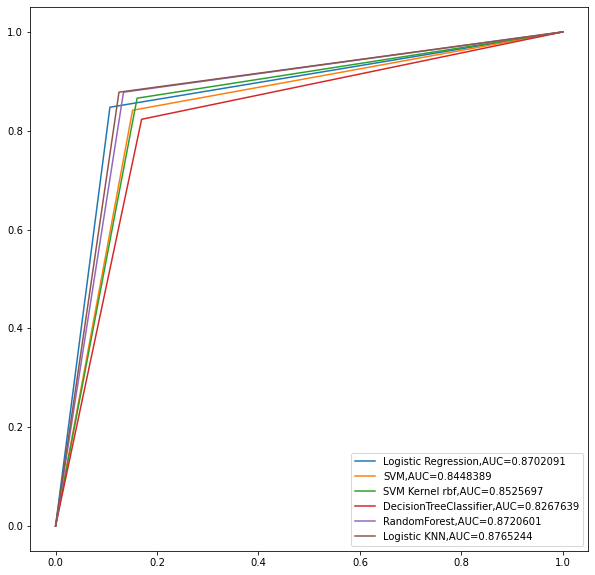

In [51]:
plt.figure(figsize=(10,10))
fpr1,tpr1,_ = roc_curve(y_test,y_lr_pred)
fpr3,tpr3,_= roc_curve(y_test,y_tr_pred)
fpr4,tpr4,_ = roc_curve(y_test,y_knn_pred)
fpr5,tpr5,_ = roc_curve(y_test,y_SVM_pred)
fpr6,tpr6,_ = roc_curve(y_test,y_rf_pred)
fpr7,tpr7,_ = roc_curve(y_test,y_SVM_pred2)
auc1 = round(roc_auc_score(y_test,y_lr_pred),7)
auc3 = round(roc_auc_score(y_test,y_tr_pred),7)
auc4 = round(roc_auc_score(y_test,y_knn_pred),7)
auc5 = round(roc_auc_score(y_test,y_SVM_pred),7)
auc6 = round(roc_auc_score(y_test,y_rf_pred),7)
auc7 = round(roc_auc_score(y_test,y_SVM_pred2),7)
plt.plot(fpr1,tpr1,label="Logistic Regression,AUC="+str(auc1))
plt.plot(fpr5,tpr5,label="SVM,AUC="+str(auc5))
plt.plot(fpr7,tpr7,label="SVM Kernel rbf,AUC="+str(auc7))
plt.plot(fpr3,tpr3,label="DecisionTreeClassifier,AUC="+str(auc3))
plt.plot(fpr6,tpr6,label="RandomForest,AUC="+str(auc6))
plt.plot(fpr4,tpr4,label="Logistic KNN,AUC="+str(auc4))
plt.legend()